# 627 Project 2
## Statoil/C-CORE Iceberg Classifier Challenge

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

import tensorflow as tf
import os

In [4]:
def read_jason(file_path):
    # Read file with panda jason
    df = pd.read_json(file_path)
    # Repalce missing value with -1
    df['inc_angle'] = df['inc_angle'].replace('na', -1).astype(float)
    # reshape bands
    band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_1"]])
    band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_2"]])
    df = df.drop(['band_1', 'band_2'], axis=1)
    bands = np.stack((band1, band2), axis=-1)
    del band1, band2
    
    return df, bands

In [36]:
def show_plt(batch, train, bands, band_num=0):
    test = []
    figsize(12,12)
    for i, b in enumerate(batch):
        subplot(3,3,i+1)
        imshow(bands[b].transpose(2,0,1)[band_num])
        axis('off')
        name = 'Angle ' + str(train.inc_angle[b]) 
        title(name)
        if train.is_iceberg[b]:
            text(30, 80, 'True: Ice Berg')
        else:
            text(30, 80, 'True: Ship')

In [26]:
json_path = 'data/processed/train.json'
train, bands = read_jason(json_path)

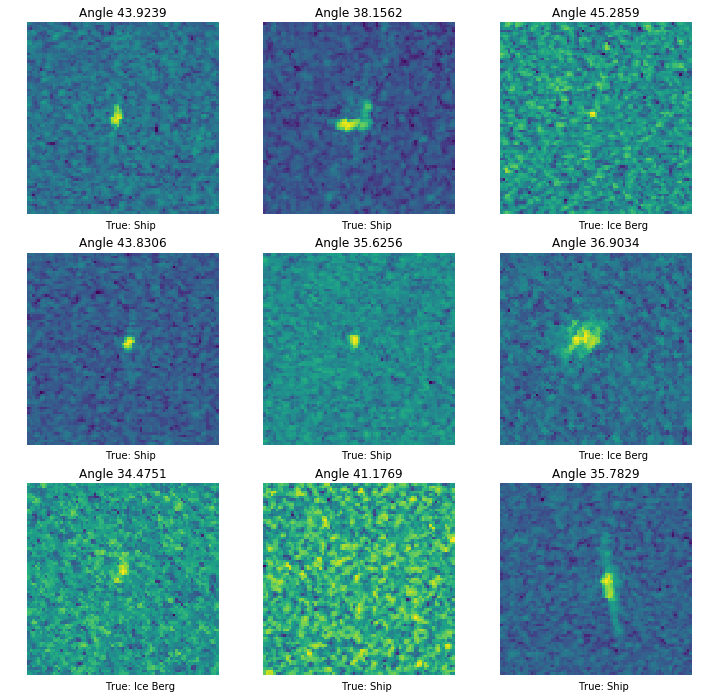

In [38]:
show_plt(range(9), train, bands, band_num=1)

In [ ]:
# Boss said use sklean PCA
# We also need to remove nocize

In [42]:
n = 75*75*2
s1 = np.zeros(n)
s2 = np.zeros((n,n))
m = len(bands)
for i, image in enumerate(bands):
    x = image.flatten()
    s1 += x
    s2 += np.outer(x,x)
    print "\r{:5}/{}".format(i+1, m),

mu = s1/m
var = s2/m - np.outer(mu, mu)

 1604/1604                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [43]:
print mu, var

[-21.30232645 -26.69814431 -21.28886582 ..., -26.6630151  -21.23203237
 -26.59557802] [[ 21.71735691   6.22412159  19.18487847 ...,   5.54890151  16.15278411
    5.61955919]
 [  6.22412159   8.8641478    6.2785436  ...,   3.96350974   5.87843682
    3.85976066]
 [ 19.18487847   6.2785436   21.01773496 ...,   5.45060884  15.7140571
    5.45599406]
 ..., 
 [  5.54890151   3.96350974   5.45060884 ...,   8.71503369   5.92976757
    6.33980285]
 [ 16.15278411   5.87843682  15.7140571  ...,   5.92976757  22.18030211
    6.02640161]
 [  5.61955919   3.85976066   5.45599406 ...,   6.33980285   6.02640161
    8.06051561]]


In [44]:
variances, components = np.eigh(var)

AttributeError: 'module' object has no attribute 'eigh'

In [ ]:
variances /= variances.sum()

In [ ]:
contribution = np.cumsum(variances)

In [35]:
train

,id,inc_angle,is_iceberg
0,dfd5f913,43.9239,0
1,e25388fd,38.1562,0
2,58b2aaa0,45.2859,1
3,4cfc3a18,43.8306,0
4,271f93f4,35.6256,0
5,b51d18b5,36.9034,1
6,31da1a04,34.4751,1
7,56929c16,41.1769,0
8,525ab75c,35.7829,0
9,192f56eb,43.3007,0
